[(1, 0), (0, 1), (1, 1), (-1, 0), (0, -1), (-1, -1), (1, -1), (-1, 1)]
[{(0, 0), (-1, 0)}, {(-1, 1), (0, 0)}]
CHECK 2 :c,len=> 2 2


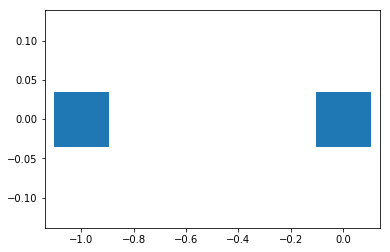

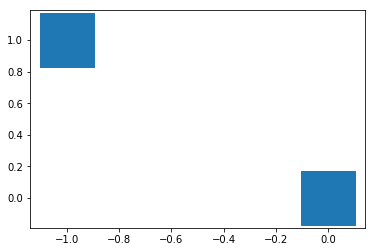


[(1, 0), (0, 1), (1, 1), (-1, 0), (0, -1), (-1, -1), (1, -1), (-1, 1)]
[(0, 0), (-1, 1), (0, 1), (-2, 0), (-1, -1), (-2, -1), (0, -1), (-2, 1)]
[(0, 1), (-1, 2), (0, 2), (-2, 1), (-1, 0), (-2, 0), (0, 0), (-2, 2)]
[(1, 0), (0, 1), (1, 1), (-1, 0), (0, -1), (-1, -1), (1, -1), (-1, 1)]
[{(0, 0), (-1, 0), (-1, -1)}, {(-1, 0), (0, 0), (-2, 0)}, {(-1, 1), (-1, 2), (0, 0)}, {(-1, 1), (0, 0), (-2, 0)}, {(1, 0), (-1, 1), (0, 0)}, {(-1, 1), (0, 0), (1, -1)}]
CHECK 3 :c,len=> 6 6


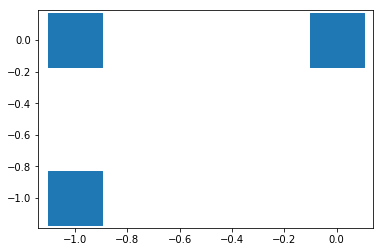

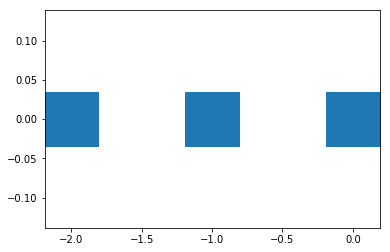

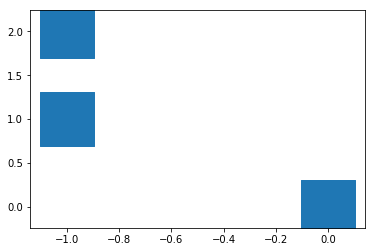

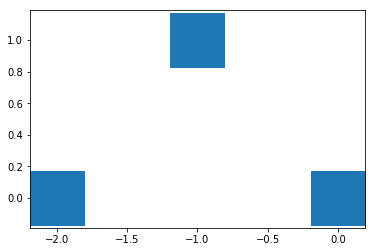

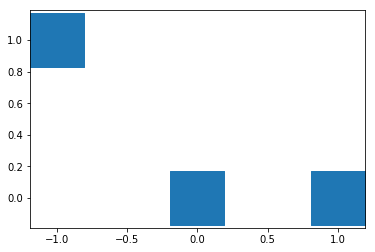

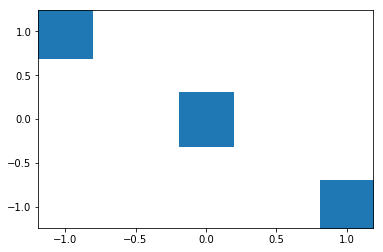


[(1, 0), (0, 1), (1, 1), (-1, 0), (0, -1), (-1, -1), (1, -1), (-1, 1)]
[(0, 0), (-1, 1), (0, 1), (-2, 0), (-1, -1), (-2, -1), (0, -1), (-2, 1)]
[(0, -1), (-1, 0), (0, 0), (-2, -1), (-1, -2), (-2, -2), (0, -2), (-2, 0)]
[(0, 0), (-1, 1), (0, 1), (-2, 0), (-1, -1), (-2, -1), (0, -1), (-2, 1)]
[(1, 0), (0, 1), (1, 1), (-1, 0), (0, -1), (-1, -1), (1, -1), (-1, 1)]
[(-1, 0), (-2, 1), (-1, 1), (-3, 0), (-2, -1), (-3, -1), (-1, -1), (-3, 1)]
[(0, 1), (-1, 2), (0, 2), (-2, 1), (-1, 0), (-2, 0), (0, 0), (-2, 2)]
[(0, 2), (-1, 3), (0, 3), (-2, 2), (-1, 1), (-2, 1), (0, 1), (-2, 3)]
[(1, 0), (0, 1), (1, 1), (-1, 0), (0, -1), (-1, -1), (1, -1), (-1, 1)]
[(0, 1), (-1, 2), (0, 2), (-2, 1), (-1, 0), (-2, 0), (0, 0), (-2, 2)]
[(1, 0), (0, 1), (1, 1), (-1, 0), (0, -1), (-1, -1), (1, -1), (-1, 1)]
[(-1, 0), (-2, 1), (-1, 1), (-3, 0), (-2, -1), (-3, -1), (-1, -1), (-3, 1)]
[(2, 0), (1, 1), (2, 1), (0, 0), (1, -1), (0, -1), (2, -1), (0, 1)]
[(0, 1), (-1, 2), (0, 2), (-2, 1), (-1, 0), (-2, 0), (0, 0), (-2

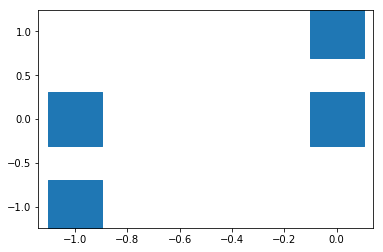

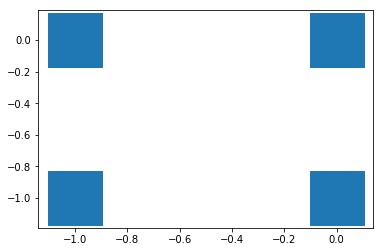

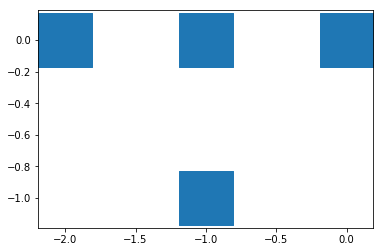

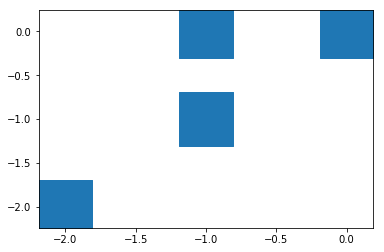

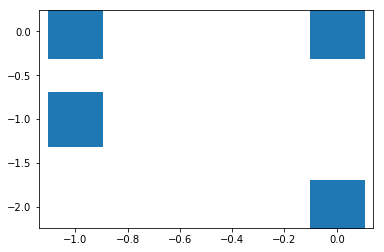

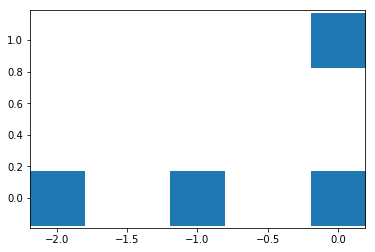

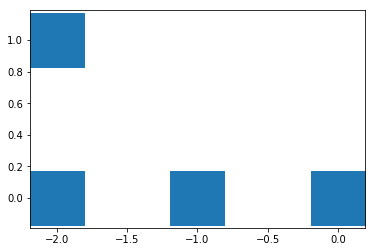

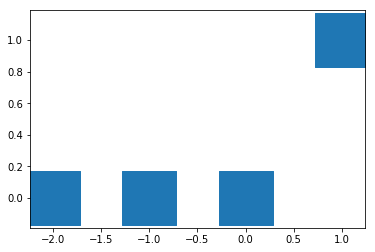

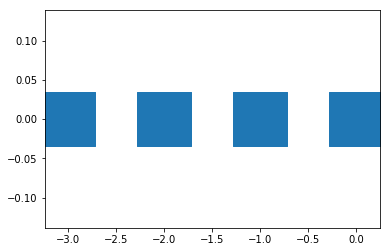

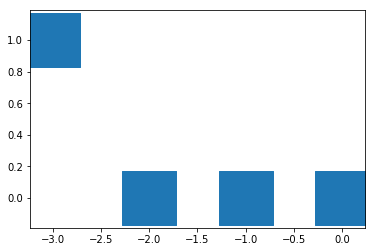

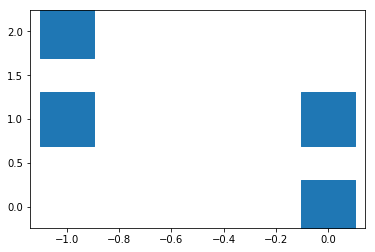

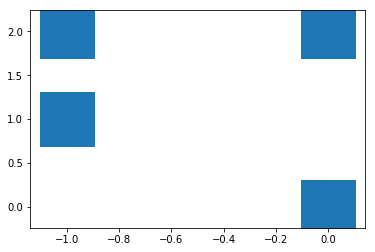

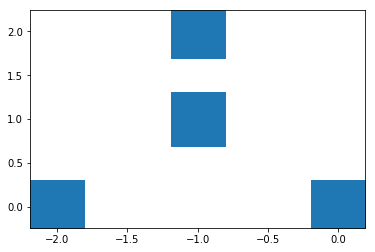

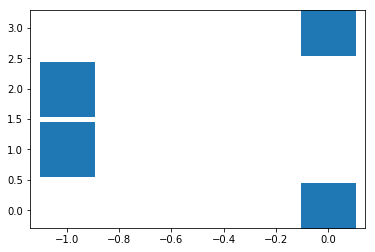

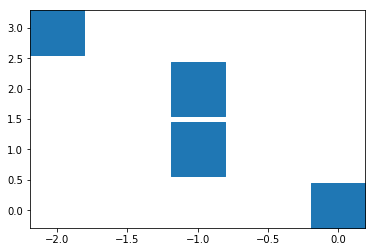

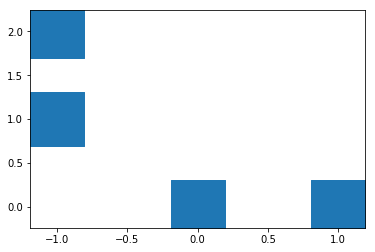

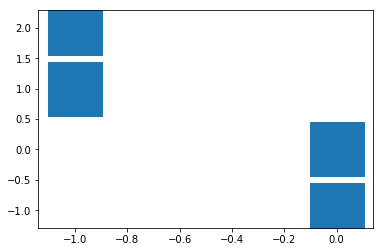

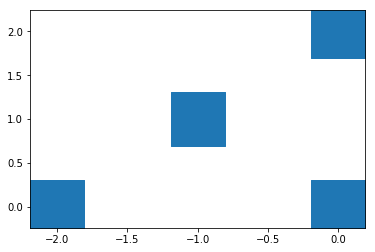

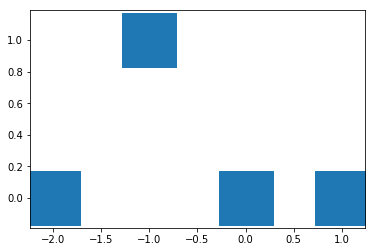

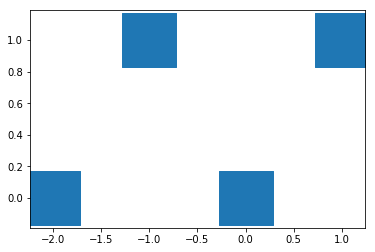

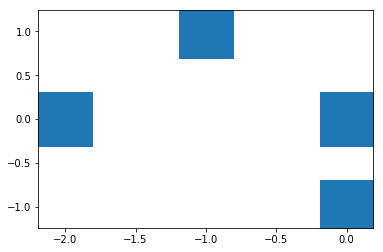

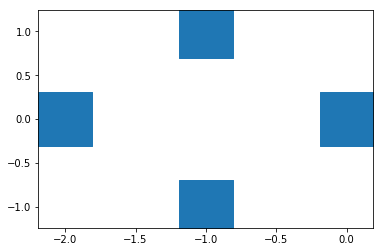

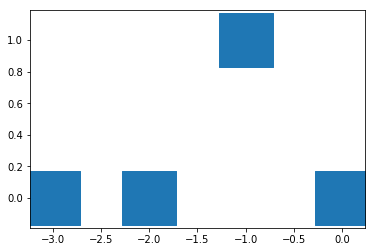

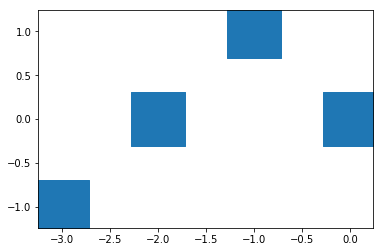

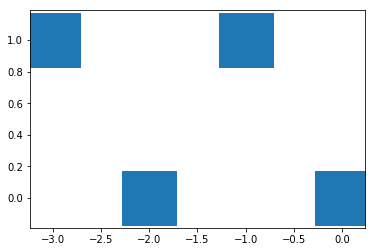

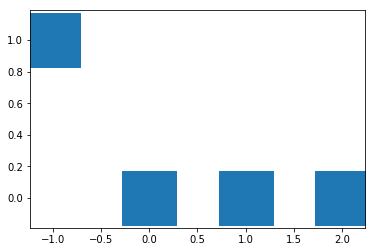

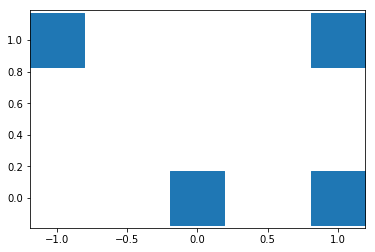

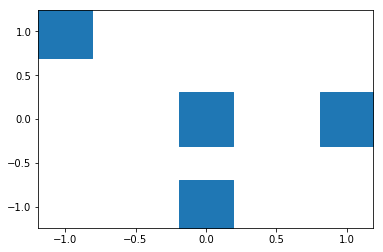

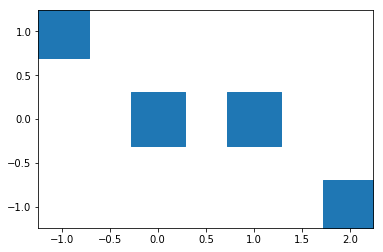

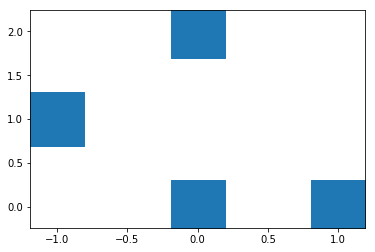

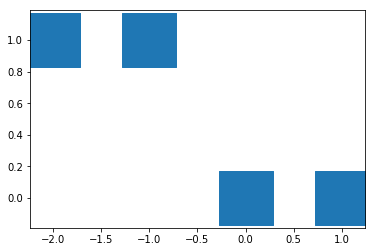

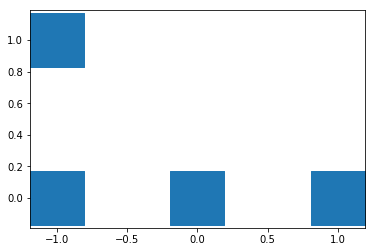

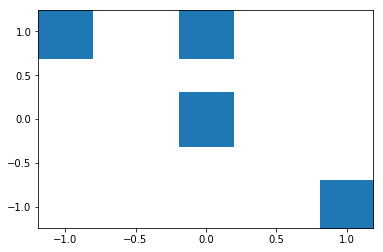

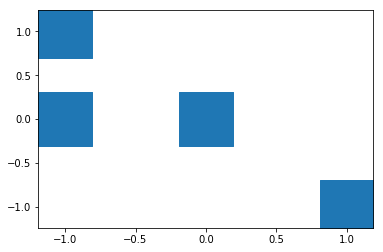

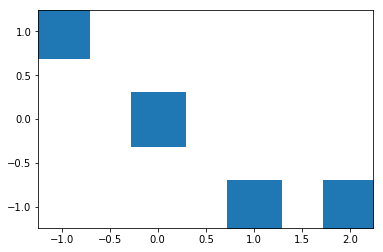

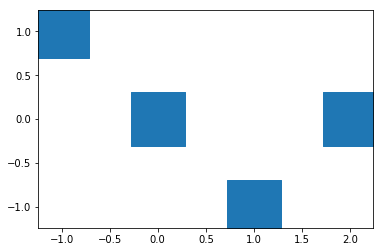

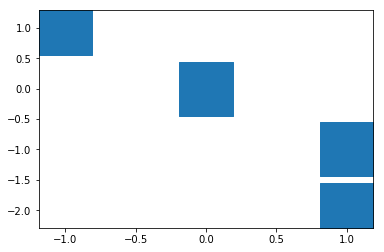

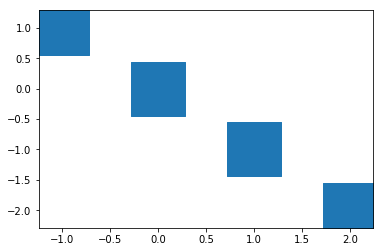

In [57]:
import itertools
import matplotlib.pyplot as plt

def px(a):
    return (a[0]+1,a[1])
def py(a):
    return (a[0],a[1]+1)
def pxy(a):
    return (a[0]+1,a[1]+1)

def mx(a):
    return (a[0]-1,a[1])
def my(a):
    return (a[0],a[1]-1)
def mxy(a):
    return (a[0]-1,a[1]-1)

def pmxy(a):
    return (a[0]+1,a[1]-1)
def mpxy(a):
    return (a[0]-1,a[1]+1)

def connect(a):
    return [px(a),py(a),pxy(a),mx(a),my(a),mxy(a),pmxy(a),mpxy(a)]

def checksize(a,N):
    if len(set(a))==N:
        return True
    else:
        False
    
def rot1(at):
    bt=[]
    a=[[-100,-100]]*len(at)
    for n in range(0,len(at)):
        b=at[n][0]
        a[n][0]=-at[n][1]
        a[n][1]=b
        bt.append((a[n][0],a[n][1]))
    return bt
        
def rot2(at):
    bt=[]
    a=[[-100,-100]]*len(at)
    for n in range(0,len(at)):
        a[n][0]=-at[n][0]
        a[n][1]=-at[n][1]
        bt.append((a[n][0],a[n][1]))
    return bt
    
def rot3(at):
    bt=[]
    a=[[-100,-100]]*len(at)
    for n in range(0,len(at)):
        b=at[n][0]
        a[n][0]=at[n][1]
        a[n][1]=-b
        bt.append((a[n][0],a[n][1]))
    return bt

def shift(a,bs):
    al=list(itertools.permutations(a))
    
    b=[]
    for x in bs:
        b.append(x)

    for x in al:
        c=x[0][0]-b[0][0]
        d=x[0][1]-b[0][1]
        BOOL=True
        for n in range(1,len(b)):
            cc=x[n][0]-b[n][0]
            dd=x[n][1]-b[n][1]
            if c==cc and d==dd:
                BOOL=BOOL and True
            else:
                BOOL=BOOL and False
                break
        if BOOL:
            break
    return BOOL

def setlist(LS):
    LL=[]
    for l in LS:
        LL.append(list(l))

    return LL

def dbcheck(ss,N):
    count=0
    for s in ss:
        for t in ss:
            if s==t:
                count+=1
    print('CHECK',N,':c,len=>',count,len(ss))
    return

def prep(s,l,N):
    for ps in s:
        for p in ps:
            cp=connect(p)
            print(cp)
            for cl in cp:
                if cl not in ps:
                    pss=list(ps)
                    pss.append(cl)
                    pss.sort()
                    if checksize(pss,N):
                        if l==[]:
                            l.append(pss)
                        elif pss not in l:
                            l.append(pss)
                            
    return l

def rot123(l):
    for ps in l:
        q1=rot1(ps)
        for qs in l:
            if ps!=qs:
                if shift(q1,qs) and (ps in l):
                    l.remove(ps)
                    break

    for ps in l:
        q2=rot2(ps)
        for qs in l:
            if ps!=qs:
                if shift(q2,qs) and (ps in l):
                    l.remove(ps)
                    break

    for ps in l:
        q3=rot3(ps)
        for qs in l:
            if ps!=qs:
                if shift(q3,qs) and (ps in l):
                    l.remove(ps)
                    break
                    
    return l


def plot2d(s):
    for f in s:
        x, y = zip(*f)
        plt.scatter(x, y,marker=",",s=3000)
        plt.show()

    print('')
    return

def output(l):
    s=[]
    for ps in l:
        s.append(set(tuple(ps)))
    
    print(s)
    return s

o=(0,0)
s1=[{o}]

l2=[]
l2=prep(s1,l2,2)
l2=rot123(l2)
s2=output(l2)    
dbcheck(s2,2)
plot2d(s2)

l3=[]
l3=prep(s2,l3,3)
l3=rot123(l3)
s3=output(l3)
dbcheck(s3,3)
plot2d(s3)

l4=[]
l3=prep(s3,l4,4)
l3=rot123(l4)
s4=output(l4)
dbcheck(s4,4)
plot2d(s4)
